In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.api import *
import researchpy as rpy


from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet

In [9]:
df = pd.read_csv('Stores.csv')
df.drop('Store ID ',axis=1,inplace=True)
df

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store_Area            896 non-null    int64
 1   Items_Available       896 non-null    int64
 2   Daily_Customer_Count  896 non-null    int64
 3   Store_Sales           896 non-null    int64
dtypes: int64(4)
memory usage: 28.1 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_Area,896.0,1485.409598,250.237011,775.0,1316.75,1477.0,1653.50,2229.0
Items_Available,896.0,1782.035714,299.872053,932.0,1575.50,1773.5,1982.75,2667.0
Daily_Customer_Count,896.0,786.350446,265.389281,10.0,600.00,780.0,970.00,1560.0
Store_Sales,896.0,59351.305804,17190.741895,14920.0,46530.00,58605.0,71872.50,116320.0


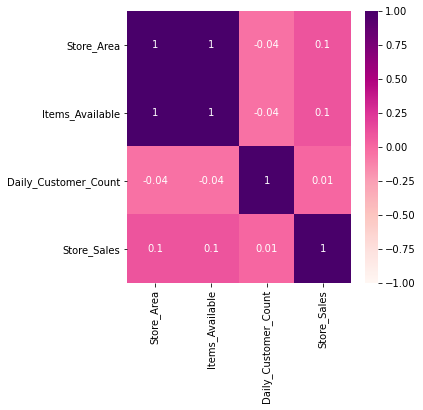

In [12]:
plt.figure(figsize=(5, 5))
ax = sns.heatmap(df.corr().round(2),vmin=-1, vmax=1, annot=True, cmap='RdPu')

<AxesSubplot:xlabel='Store_Area', ylabel='Items_Available'>

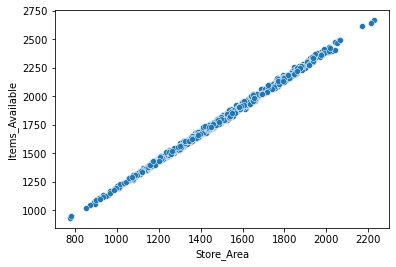

In [13]:
sns.scatterplot(data=df, x="Store_Area", y="Items_Available")

In [15]:
df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

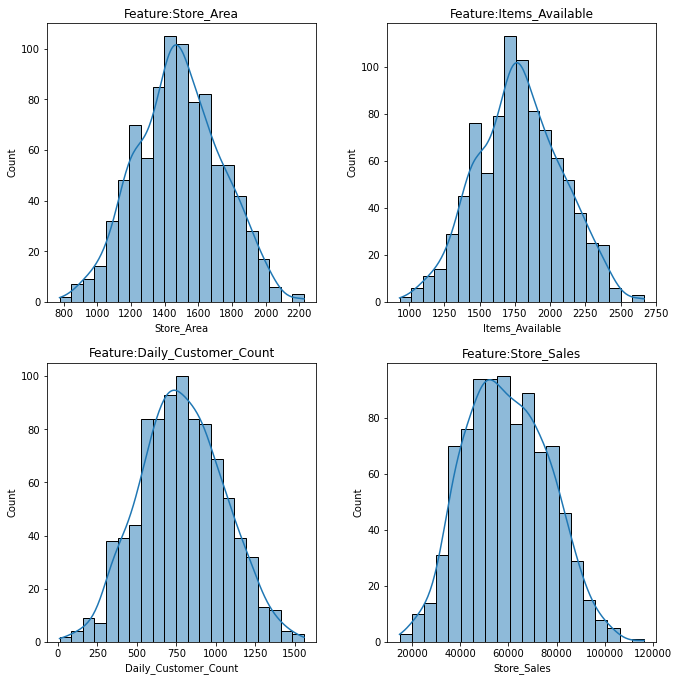

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout(pad=4.0)

features = ['Store_Area', 'Items_Available', 'Daily_Customer_Count','Store_Sales']

for f,ax in zip(features,axs.ravel()):
    ax=sns.histplot(ax=ax,data=df,x=df[f],kde=True)
    ax.set_title('Feature:'+ f)

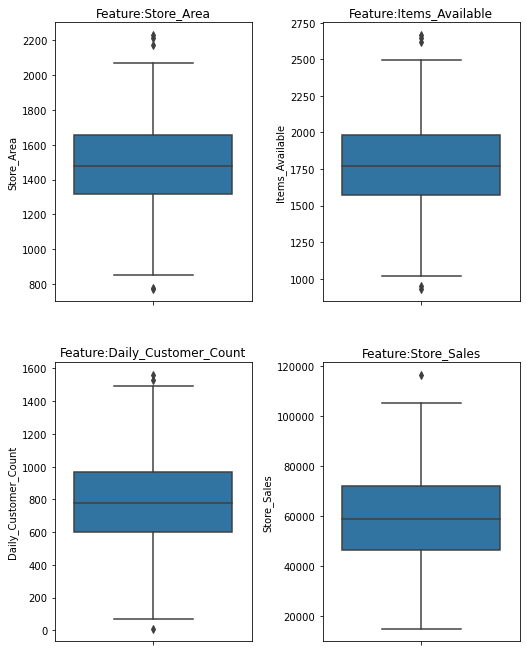

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(8,10))
fig.tight_layout(pad=4.0)

for f,ax in zip(features,axs.ravel()):
    ax=sns.boxplot(ax=ax,data=df,y=df[f])
    ax.set_title('Feature:'+ f)

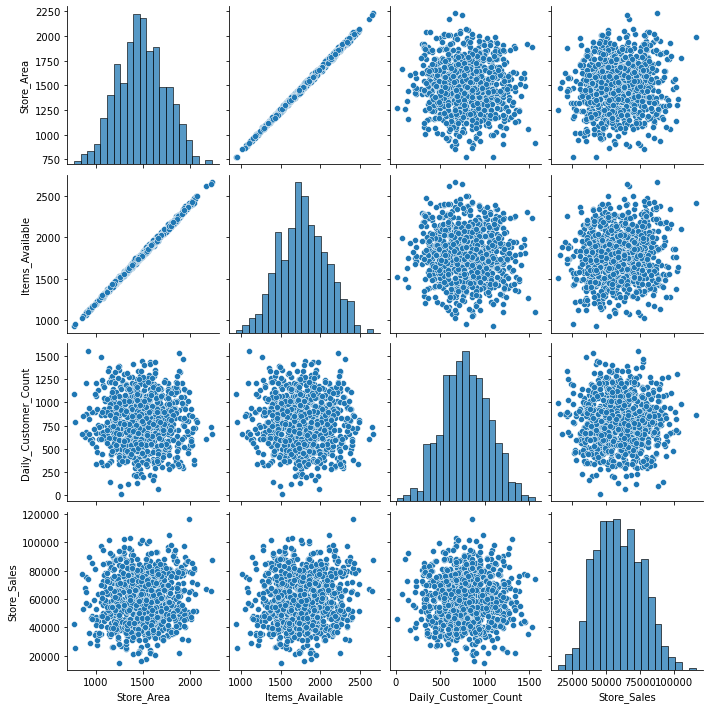

In [18]:
df_drop_id = df[features]
sns.pairplot(df_drop_id)

In [19]:
df.columns

Index(['Store_Area', 'Items_Available', 'Daily_Customer_Count', 'Store_Sales'], dtype='object')

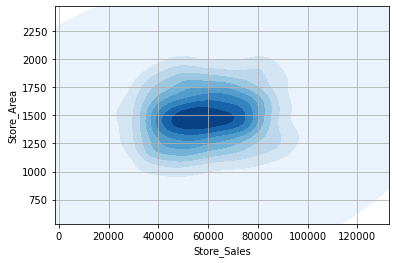

In [20]:
sns.kdeplot(x=df.Store_Sales, y=df.Store_Area, cmap="Blues", shade=True, thresh=0)
plt.grid()

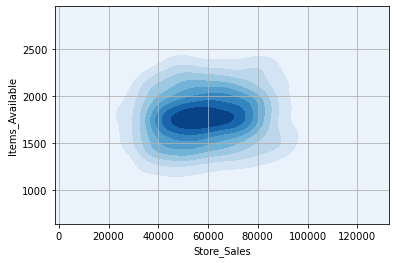

In [21]:
sns.kdeplot(x=df.Store_Sales, y=df.Items_Available, cmap="Blues", shade=True, thresh=0)
plt.grid()

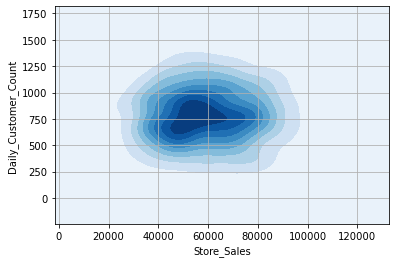

In [22]:
sns.kdeplot(x=df.Store_Sales, y=df.Daily_Customer_Count, cmap="Blues", shade=True, thresh=0)
plt.grid()

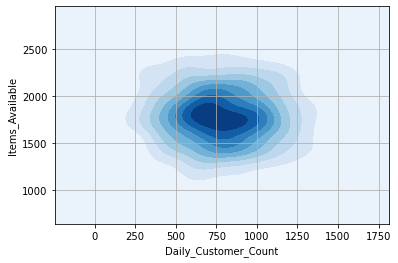

In [23]:
sns.kdeplot(x=df.Daily_Customer_Count, y=df.Items_Available, cmap="Blues", shade=True, thresh=0)
plt.grid()

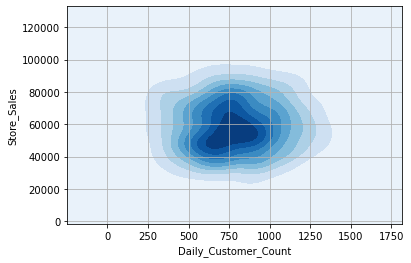

In [24]:
sns.kdeplot(x=df.Daily_Customer_Count, y=df.Store_Sales, cmap="Blues", shade=True, thresh=0)
plt.grid()

In [25]:
x = df.iloc[:,0:-1].to_numpy()
y = df.iloc[:,-1].to_numpy()

lg_reg = LinearRegression()
rf_reg = RandomForestRegressor()
svm_reg = SVR()
gb_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()
en_reg = ElasticNet()

reg_list = [lg_reg,rf_reg,svm_reg,gb_reg,xgb_reg,lgbm_reg,en_reg]

for reg in reg_list:
        
    reg.fit(x,y)
        
    y_pred = reg.predict(x)
    
    mse = mean_squared_error(y_pred,y)
    rmse = np.sqrt(mean_squared_error(y_pred,y))
    mae = mean_absolute_error(y_pred,y)
    score = reg.score(x,y)
    
    print('Regressor:{}\nMSE:{:.2f}\nRMSE:{:.2f}\nMAE:{:.2f}\nScore:{:.4f}\n\n'.format(str(reg),mse,rmse,mae,score))

Regressor:LinearRegression()
MSE:292048560.59
RMSE:17089.43
MAE:14063.91
Score:0.0106


Regressor:RandomForestRegressor()
MSE:47973682.12
RMSE:6926.30
MAE:5572.39
Score:0.8375


Regressor:SVR()
MSE:295710387.56
RMSE:17196.23
MAE:14167.55
Score:-0.0018


Regressor:GradientBoostingRegressor()
MSE:208692302.86
RMSE:14446.19
MAE:11900.81
Score:0.2930


Regressor:XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
MSE:22500

C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130648330223.15257, tolerance: 26449183.817220986
  model = cd_fast.enet_coordinate_descent(
